In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Object creation

See the [Data structure intro section](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro).


Creating a [Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series) by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

We can create `Series` from `numpy.array`.

In [3]:
s1 = pd.Series(np.array([1,2,3,4,5]))
s1

0    1
1    2
2    3
3    4
4    5
dtype: int64

Creating a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame) by passing a NumPy array, with a `datetime` index and labeled columns:

In [4]:
dates = pd.date_range('20180101', periods=6)
dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2018-01-01,-0.642522,-0.119447,0.832813,1.964042
2018-01-02,-1.574791,-0.766309,0.972901,-0.466775
2018-01-03,0.210936,0.324093,-0.550388,-1.811604
2018-01-04,0.924042,0.210708,0.205901,-0.489483
2018-01-05,0.264888,-0.926411,-0.995068,-0.506860
2018-01-06,0.037036,1.258520,0.171964,1.343782


Creating `DataFrame` from python `dict`.

In [6]:
df2 = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### Viewing Data

In [8]:
df.head()

,A,B,C,D
2018-01-01,-0.642522,-0.119447,0.832813,1.964042
2018-01-02,-1.574791,-0.766309,0.972901,-0.466775
2018-01-03,0.210936,0.324093,-0.550388,-1.811604
2018-01-04,0.924042,0.210708,0.205901,-0.489483
2018-01-05,0.264888,-0.926411,-0.995068,-0.506860


Display the `index`, columns, and the underlying `NumPy` data:

In [9]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[-0.64252203, -0.1194468 ,  0.83281256,  1.96404151],
       [-1.57479056, -0.76630853,  0.97290082, -0.46677475],
       [ 0.21093616,  0.32409254, -0.55038785, -1.81160375],
       [ 0.92404187,  0.21070773,  0.20590133, -0.48948326],
       [ 0.26488761, -0.92641125, -0.99506841, -0.50686032],
       [ 0.03703598,  1.25852013,  0.17196409,  1.34378223]])

Some basic stats.

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.130068,-0.003141,0.106354,0.005517
std,0.867315,0.799122,0.766460,1.389915
min,-1.574791,-0.926411,-0.995068,-1.811604
25%,-0.472633,-0.604593,-0.369800,-0.502516
50%,0.123986,0.045630,0.188933,-0.478129
75%,0.251400,0.295746,0.676085,0.891143
max,0.924042,1.258520,0.972901,1.964042


In [13]:
df.T

,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00
A,-0.642522,-1.574791,0.210936,0.924042,0.264888,0.037036
B,-0.119447,-0.766309,0.324093,0.210708,-0.926411,1.258520
C,0.832813,0.972901,-0.550388,0.205901,-0.995068,0.171964
D,1.964042,-0.466775,-1.811604,-0.489483,-0.506860,1.343782


In [14]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2018-01-01,1.964042,0.832813,-0.119447,-0.642522
2018-01-02,-0.466775,0.972901,-0.766309,-1.574791
2018-01-03,-1.811604,-0.550388,0.324093,0.210936
2018-01-04,-0.489483,0.205901,0.210708,0.924042
2018-01-05,-0.506860,-0.995068,-0.926411,0.264888
2018-01-06,1.343782,0.171964,1.258520,0.037036


In [15]:
df.sort_values(by='B')

,A,B,C,D
2018-01-05,0.264888,-0.926411,-0.995068,-0.506860
2018-01-02,-1.574791,-0.766309,0.972901,-0.466775
2018-01-01,-0.642522,-0.119447,0.832813,1.964042
2018-01-04,0.924042,0.210708,0.205901,-0.489483
2018-01-03,0.210936,0.324093,-0.550388,-1.811604
2018-01-06,0.037036,1.258520,0.171964,1.343782


### Selection by label

See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced).

In [16]:
df['A']

2018-01-01   -0.642522
2018-01-02   -1.574791
2018-01-03    0.210936
2018-01-04    0.924042
2018-01-05    0.264888
2018-01-06    0.037036
Freq: D, Name: A, dtype: float64

In [17]:
df[0:3]

,A,B,C,D
2018-01-01,-0.642522,-0.119447,0.832813,1.964042
2018-01-02,-1.574791,-0.766309,0.972901,-0.466775
2018-01-03,0.210936,0.324093,-0.550388,-1.811604


In [18]:
df['20180102':'20180104']

,A,B,C,D
2018-01-02,-1.574791,-0.766309,0.972901,-0.466775
2018-01-03,0.210936,0.324093,-0.550388,-1.811604
2018-01-04,0.924042,0.210708,0.205901,-0.489483


Selection by label:

In [19]:
df.loc[dates[0]]

A   -0.642522
B   -0.119447
C    0.832813
D    1.964042
Name: 2018-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [20]:
df.loc[:,['A','B']]

,A,B
2018-01-01,-0.642522,-0.119447
2018-01-02,-1.574791,-0.766309
2018-01-03,0.210936,0.324093
2018-01-04,0.924042,0.210708
2018-01-05,0.264888,-0.926411
2018-01-06,0.037036,1.258520


Showing label slicing, both endpoints are **included**:

In [21]:
df.loc['20180102':'20180104',['A','B']]

,A,B
2018-01-02,-1.574791,-0.766309
2018-01-03,0.210936,0.324093
2018-01-04,0.924042,0.210708


Reduction in the dimensions of the returned object:

In [22]:
df.loc['20180102',['A','B']]

A   -1.574791
B   -0.766309
Name: 2018-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [23]:
df.loc[dates[0],'A']

-0.6425220295278277

For getting fast access to a scalar (equivalent to the prior method):

In [24]:
df.at[dates[0],'A']

-0.6425220295278277

**Note**

While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, use the optimized pandas data access methods, `.at`, `.iat`, `.loc` and `.iloc`. 

### Selection by position

In [25]:
df.iloc[3]

A    0.924042
B    0.210708
C    0.205901
D   -0.489483
Name: 2018-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [26]:
df.iloc[3:5,0:2]

,A,B
2018-01-04,0.924042,0.210708
2018-01-05,0.264888,-0.926411


By lists of integer position locations, similar to the numpy/python style:

In [27]:
df.iloc[[1,2,4],[0,2]]

,A,C
2018-01-02,-1.574791,0.972901
2018-01-03,0.210936,-0.550388
2018-01-05,0.264888,-0.995068


For slicing rows explicitly:

In [28]:
df.iloc[1:3,:]

,A,B,C,D
2018-01-02,-1.574791,-0.766309,0.972901,-0.466775
2018-01-03,0.210936,0.324093,-0.550388,-1.811604


For slicing columns explicitly:

In [29]:
df.iloc[:,1:3]

,B,C
2018-01-01,-0.119447,0.832813
2018-01-02,-0.766309,0.972901
2018-01-03,0.324093,-0.550388
2018-01-04,0.210708,0.205901
2018-01-05,-0.926411,-0.995068
2018-01-06,1.258520,0.171964


For getting a value explicitly:

In [30]:
df.iloc[1,1]

-0.7663085267090567

For getting fast access to a scalar (equivalent to the prior method):

In [31]:
df.iat[1,1]

-0.7663085267090567

### Boolean indexing

In [32]:
df[df.A > 0]

,A,B,C,D
2018-01-03,0.210936,0.324093,-0.550388,-1.811604
2018-01-04,0.924042,0.210708,0.205901,-0.489483
2018-01-05,0.264888,-0.926411,-0.995068,-0.506860
2018-01-06,0.037036,1.258520,0.171964,1.343782


Selecting values from a DataFrame where a boolean condition is met.

In [33]:
df[df > 0]

,A,B,C,D
2018-01-01,NaN,NaN,0.832813,1.964042
2018-01-02,NaN,NaN,0.972901,NaN
2018-01-03,0.210936,0.324093,NaN,NaN
2018-01-04,0.924042,0.210708,0.205901,NaN
2018-01-05,0.264888,NaN,NaN,NaN
2018-01-06,0.037036,1.258520,0.171964,1.343782


Using the [isin()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html#pandas.Series.isin) method for filtering:

In [34]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2018-01-01,-0.642522,-0.119447,0.832813,1.964042,one
2018-01-02,-1.574791,-0.766309,0.972901,-0.466775,one
2018-01-03,0.210936,0.324093,-0.550388,-1.811604,two
2018-01-04,0.924042,0.210708,0.205901,-0.489483,three
2018-01-05,0.264888,-0.926411,-0.995068,-0.506860,four
2018-01-06,0.037036,1.258520,0.171964,1.343782,three


In [35]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2018-01-03,0.210936,0.324093,-0.550388,-1.811604,two
2018-01-05,0.264888,-0.926411,-0.995068,-0.506860,four


### Setting

Setting a new column automatically aligns the data by the indexes.

In [36]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20180102', periods=6))
s1

2018-01-02    1
2018-01-03    2
2018-01-04    3
2018-01-05    4
2018-01-06    5
2018-01-07    6
Freq: D, dtype: int64

In [37]:
df['F'] = s1

Setting values by label:

In [38]:
df.at[dates[0],'A'] = 0

Setting values by position:

In [39]:
df.iat[0,1] = 0

Setting by assigning with a NumPy array:

In [40]:
df.loc[:,'D'] = np.array([5] * len(df))

In [41]:
df

,A,B,C,D,F
2018-01-01,0.000000,0.000000,0.832813,5,NaN
2018-01-02,-1.574791,-0.766309,0.972901,5,1.0
2018-01-03,0.210936,0.324093,-0.550388,5,2.0
2018-01-04,0.924042,0.210708,0.205901,5,3.0
2018-01-05,0.264888,-0.926411,-0.995068,5,4.0
2018-01-06,0.037036,1.258520,0.171964,5,5.0


A `where` operation with setting.

In [42]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2018-01-01,0.000000,0.000000,-0.832813,-5,NaN
2018-01-02,-1.574791,-0.766309,-0.972901,-5,-1.0
2018-01-03,-0.210936,-0.324093,-0.550388,-5,-2.0
2018-01-04,-0.924042,-0.210708,-0.205901,-5,-3.0
2018-01-05,-0.264888,-0.926411,-0.995068,-5,-4.0
2018-01-06,-0.037036,-1.258520,-0.171964,-5,-5.0


### Missing data

pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data) section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the dat

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2018-01-01,0.000000,0.000000,0.832813,5,NaN,1.0
2018-01-02,-1.574791,-0.766309,0.972901,5,1.0,1.0
2018-01-03,0.210936,0.324093,-0.550388,5,2.0,NaN
2018-01-04,0.924042,0.210708,0.205901,5,3.0,NaN


To drop `any` rows that have missing data.

In [44]:
df1.dropna(how='any')

,A,B,C,D,F,E
2018-01-02,-1.574791,-0.766309,0.972901,5,1.0,1.0


Filling missing data

In [45]:
df1.fillna(value=5)

,A,B,C,D,F,E
2018-01-01,0.000000,0.000000,0.832813,5,5.0,1.0
2018-01-02,-1.574791,-0.766309,0.972901,5,1.0,1.0
2018-01-03,0.210936,0.324093,-0.550388,5,2.0,5.0
2018-01-04,0.924042,0.210708,0.205901,5,3.0,5.0


To get the boolean mask where values are `nan`.

In [46]:
pd.isna(df1)

,A,B,C,D,F,E
2018-01-01,False,False,False,False,True,False
2018-01-02,False,False,False,False,False,False
2018-01-03,False,False,False,False,False,True
2018-01-04,False,False,False,False,False,True


### Operations

Operations in general exclude missing data.

In [47]:
df.mean()

A   -0.022981
B    0.016767
C    0.106354
D    5.000000
F    3.000000
dtype: float64

In [48]:
df.mean(1)  # other axis

2018-01-01    1.458203
2018-01-02    0.926360
2018-01-03    1.396928
2018-01-04    1.868130
2018-01-05    1.468682
2018-01-06    2.293504
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need **alignment**. In addition, pandas automatically broadcasts along the specified dimension.

In [49]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2018-01-01    NaN
2018-01-02    NaN
2018-01-03    1.0
2018-01-04    3.0
2018-01-05    5.0
2018-01-06    NaN
Freq: D, dtype: float64

In [50]:
df.sub(s, axis='index')

,A,B,C,D,F
2018-01-01,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.789064,-0.675907,-1.550388,4.0,1.0
2018-01-04,-2.075958,-2.789292,-2.794099,2.0,0.0
2018-01-05,-4.735112,-5.926411,-5.995068,0.0,-1.0
2018-01-06,NaN,NaN,NaN,NaN,NaN


Applying functions to the data:

In [51]:
df.apply(np.cumsum)

,A,B,C,D,F
2018-01-01,0.000000,0.000000,0.832813,5,NaN
2018-01-02,-1.574791,-0.766309,1.805713,10,1.0
2018-01-03,-1.363854,-0.442216,1.255326,15,3.0
2018-01-04,-0.439813,-0.231508,1.461227,20,6.0
2018-01-05,-0.174925,-1.157920,0.466158,25,10.0
2018-01-06,-0.137889,0.100601,0.638123,30,15.0


In [52]:
df.apply(lambda x: x.max() - x.min())

A    2.498832
B    2.184931
C    1.967969
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [53]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    0
2    4
3    5
4    6
5    3
6    0
7    2
8    0
9    0
dtype: int64

In [54]:
s.value_counts()

0    4
5    2
6    1
4    1
3    1
2    1
dtype: int64

### String methods

`Series` is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them).

In [55]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [56]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) section.

#### Concat

In [57]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.569525,-1.024172,-0.041014,0.088476
1,1.401261,-0.613206,0.722117,-0.401678
2,-1.211960,-1.675061,-0.127126,1.713325
3,-0.771260,-0.874148,-0.456736,-0.820229
4,0.997873,0.682386,-0.361427,-1.709035
5,0.875489,0.820744,-1.233011,0.074099
6,0.383734,0.572801,-0.177789,-1.092227
7,1.288972,-0.173411,-1.048639,-0.488912
8,1.586638,1.063913,1.117584,-1.187192
9,0.575059,-1.253669,0.983159,0.805090


In [58]:
pieces = [df[:3], df[3:7], df[7:]]
pieces[0]

,0,1,2,3
0,-0.569525,-1.024172,-0.041014,0.088476
1,1.401261,-0.613206,0.722117,-0.401678
2,-1.211960,-1.675061,-0.127126,1.713325


In [59]:
pd.concat(pieces)

,0,1,2,3
0,-0.569525,-1.024172,-0.041014,0.088476
1,1.401261,-0.613206,0.722117,-0.401678
2,-1.211960,-1.675061,-0.127126,1.713325
3,-0.771260,-0.874148,-0.456736,-0.820229
4,0.997873,0.682386,-0.361427,-1.709035
5,0.875489,0.820744,-1.233011,0.074099
6,0.383734,0.572801,-0.177789,-1.092227
7,1.288972,-0.173411,-1.048639,-0.488912
8,1.586638,1.063913,1.117584,-1.187192
9,0.575059,-1.253669,0.983159,0.805090


#### Join

In [60]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [61]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [62]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [63]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


#### Append

In [64]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.098476,1.638376,-1.205312,-2.017145
1,-0.647002,0.910730,-2.016571,-0.667192
2,1.042892,-1.305880,-0.033728,-0.605572
3,-1.071875,0.192422,-0.505110,-0.653332
4,0.114567,-0.482969,-0.407880,0.398505
5,0.883129,0.965873,0.367232,0.550074
6,-1.586255,-0.917614,0.365048,-1.382321
7,0.356370,0.124490,-0.995974,1.154365


In [65]:
s = df.iloc[3]
s

A   -1.071875
B    0.192422
C   -0.505110
D   -0.653332
Name: 3, dtype: float64

In [66]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.098476,1.638376,-1.205312,-2.017145
1,-0.647002,0.910730,-2.016571,-0.667192
2,1.042892,-1.305880,-0.033728,-0.605572
3,-1.071875,0.192422,-0.505110,-0.653332
4,0.114567,-0.482969,-0.407880,0.398505
5,0.883129,0.965873,0.367232,0.550074
6,-1.586255,-0.917614,0.365048,-1.382321
7,0.356370,0.124490,-0.995974,1.154365
8,-1.071875,0.192422,-0.505110,-0.653332


### Grouping
By “group by” we are referring to a process involving one or more of the following steps:

  * Splitting the data into groups based on some criteria
  * Applying a function to each group independently
  * Combining the results into a data structure

Read the [docs](https://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby).

In [67]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.383480,-1.888851
1,bar,one,-0.733561,-1.607357
2,foo,two,0.693658,2.493024
3,bar,three,0.148100,-0.048973
4,foo,two,-0.671272,-1.339653
5,bar,two,-0.218457,0.525537
6,foo,one,-1.184303,-1.330910
7,foo,three,0.135579,0.408349


In [68]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.803918,-1.130793
foo,-1.409818,-1.658040


In [69]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.733561 -1.607357
    three  0.148100 -0.048973
    two   -0.218457  0.525537
foo one   -1.567783 -3.219760
    three  0.135579  0.408349
    two    0.022385  1.153372

### Reshaping

Read the docs [here](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [here](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking)

#### Stack


In [70]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two','one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [71]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [72]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])


In [73]:
df2 = df[:4]

In [74]:
df2

A         B
first second                    
bar   one    -0.532352  0.767893
      two    -0.722382  0.442223
baz   one     0.368915 -0.827869
      two    -0.063689 -0.053583

The [stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns.

In [75]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.532352
               B    0.767893
       two     A   -0.722382
               B    0.442223
baz    one     A    0.368915
               B   -0.827869
       two     A   -0.063689
               B   -0.053583
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of `stack()` is [unstack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the last level:

In [76]:
stacked.unstack()

A         B
first second                    
bar   one    -0.532352  0.767893
      two    -0.722382  0.442223
baz   one     0.368915 -0.827869
      two    -0.063689 -0.053583

In [77]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.532352 -0.722382
      B  0.767893  0.442223
baz   A  0.368915 -0.063689
      B -0.827869 -0.053583

In [78]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.532352  0.368915
       B  0.767893 -0.827869
two    A -0.722382 -0.063689
       B  0.442223 -0.053583

### Time Series

Read the [docs](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [79]:
rng = pd.date_range('1/1/2018', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2018-01-01    26215
Freq: 5T, dtype: int64

In [80]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.429258
2012-03-07    0.003836
2012-03-08    0.908371
2012-03-09   -0.859906
2012-03-10   -0.058245
Freq: D, dtype: float64

In [81]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    1.496574
2012-02-29    0.636682
2012-03-31    1.579477
2012-04-30   -0.126763
2012-05-31    1.189604
Freq: M, dtype: float64

In [82]:
ps = ts.to_period()
ps

2012-01    1.496574
2012-02    0.636682
2012-03    1.579477
2012-04   -0.126763
2012-05    1.189604
Freq: M, dtype: float64

In [83]:
ps.to_timestamp()

2012-01-01    1.496574
2012-02-01    0.636682
2012-03-01    1.579477
2012-04-01   -0.126763
2012-05-01    1.189604
Freq: MS, dtype: float64

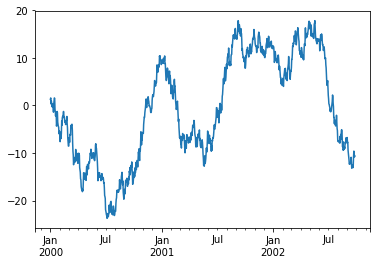

In [84]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

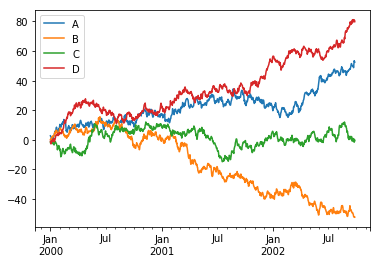

In [85]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

### Writing/reading to/from csv

In [86]:
df.to_csv('foo.csv')

In [87]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,2.701726,0.231698,-1.582398,-0.986643
1,2000-01-02,2.295132,0.546712,-2.528390,-2.234002
2,2000-01-03,1.794679,0.514973,-0.949568,-2.736050
3,2000-01-04,1.282922,-0.081611,-0.713840,-1.936311
4,2000-01-05,-0.292773,1.201463,-1.728895,-1.625389
5,2000-01-06,0.714110,1.888742,-1.959040,-0.460569
6,2000-01-07,-0.058987,1.857845,-1.377861,-0.853224
7,2000-01-08,-2.018394,2.343735,-1.582059,-0.046310
8,2000-01-09,0.439552,1.888937,-2.162018,0.048097
9,2000-01-10,0.448092,2.658639,-2.711141,-0.591176
